In [31]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [32]:
milk = pd.read_csv(r"Datasets\milk.csv",
                   index_col = 0)

In [33]:
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [40]:
scaler = StandardScaler()
scaler.fit(milk)
milk_scaled = scaler.transform(milk)

In [43]:
pca = PCA()
prin_comp = pca.fit_transform(milk_scaled)

In [44]:
pd_PC = pd.DataFrame(prin_comp,
                    columns = ["PC1","PC2","PC3","PC4","PC5"])

In [48]:
pd_PC.var() # or
print(pca.explained_variance_)

# %age variation explained
print(pca.explained_variance_ratio_*100)


[4.0404117  0.92437238 0.13429088 0.1026886  0.00656977]
[77.57590469 17.74794969  2.57838496  1.97162103  0.12613963]


## Scree Plot

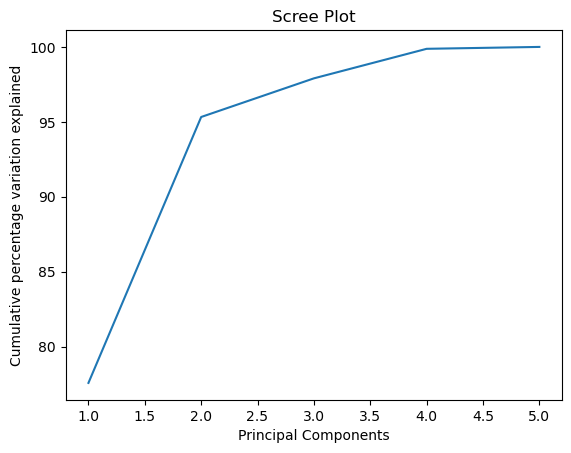

In [46]:
ys = np.cumsum(pca.explained_variance_ratio_*100)
xs = np.arange(1,6)
plt.plot(xs, ys)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative percentage variation explained")
plt.show()

## Bi-Plot

In [53]:
from pca import pca

In [54]:
scaler = StandardScaler()
scaler.fit(milk)
milk_scaled = scaler.transform(milk)
milk_scaled = pd.DataFrame(milk_scaled,
                          columns = milk.columns,
                          index = milk.index)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [25] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [25] unique colors! Available unique colors: [9].


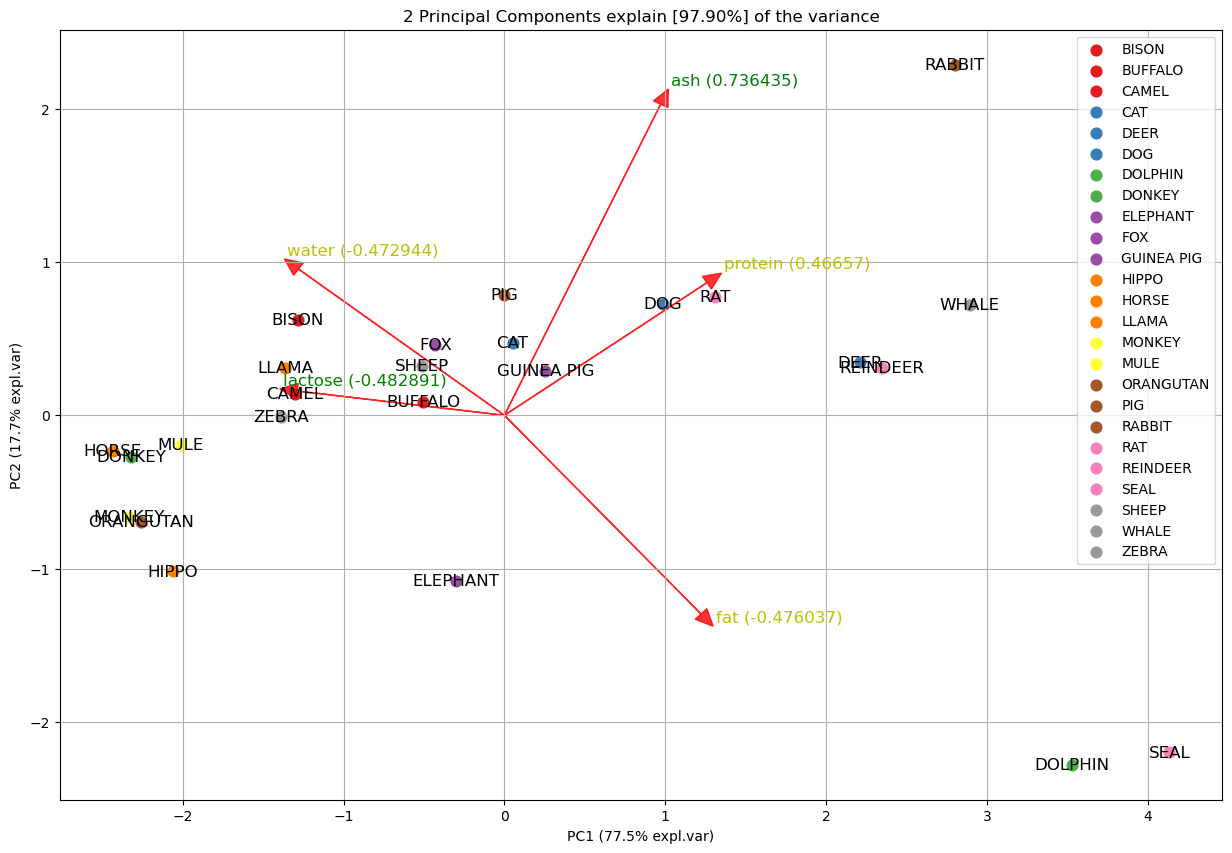

In [55]:
model = pca()
results = model.fit_transform(milk_scaled)
fig, ax= model.biplot(legend = True, label = True)